In [55]:
import pandas as pd
import numpy as np
import collection as counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [29]:
df = pd.read_csv("new_clean_email.csv")

In [51]:
df.head(2)

,label,urls,hour,day_of_week,sender_username,sender_domain,subject_clean,body_clean
0,1,1,23,1,young,iworld.de,never agree to be a loser,buck up your troubles caused by small dimensio...
1,1,1,23,1,s1983,icable.ph,befriend jenna jameson,upgrade your sex and pleasures with these tech...


In [40]:
df.dropna(subset=['subject_clean'], inplace=True)

In [42]:
df.isnull().sum()


label              0
urls               0
hour               0
day_of_week        0
sender_username    0
sender_domain      0
subject_clean      0
body_clean         0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38132 entries, 0 to 38163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   label            38132 non-null  int64 
 1   urls             38132 non-null  int64 
 2   hour             38132 non-null  int64 
 3   day_of_week      38132 non-null  int64 
 4   sender_username  38132 non-null  object
 5   sender_domain    38132 non-null  object
 6   subject_clean    38132 non-null  object
 7   body_clean       38132 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.6+ MB


In [47]:
df.describe()

,label,urls,hour,day_of_week
count,38132.000000,38132.000000,38132.000000,38132.000000
mean,0.546549,0.662042,10.362347,2.669412
std,0.497835,0.473020,6.817354,0.884873
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,2.000000
50%,1.000000,1.000000,10.000000,3.000000
75%,1.000000,1.000000,16.000000,3.000000
max,1.000000,1.000000,23.000000,6.000000


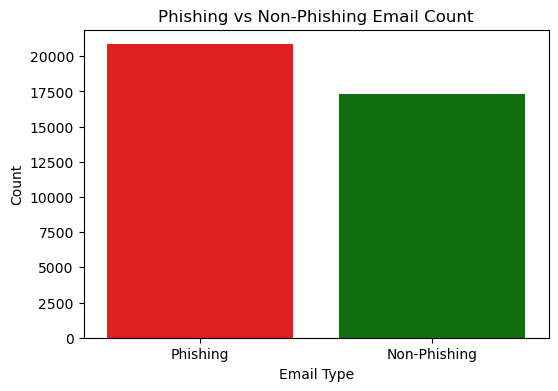

In [65]:
plt.figure(figsize=(6,4))

# Define custom colors
custom_palette = {'Non-Phishing': 'green', 'Phishing': 'red'}

# Use 'label_name' for both x and hue, and disable the legend
sns.countplot(x='label_name', hue='label_name', data=df, palette=custom_palette, legend=False)

plt.title('Phishing vs Non-Phishing Email Count')
plt.xlabel('Email Type')
plt.ylabel('Count')

plt.legend([],[], frameon=False)  # Hide legend explicitly (optional)

plt.show()

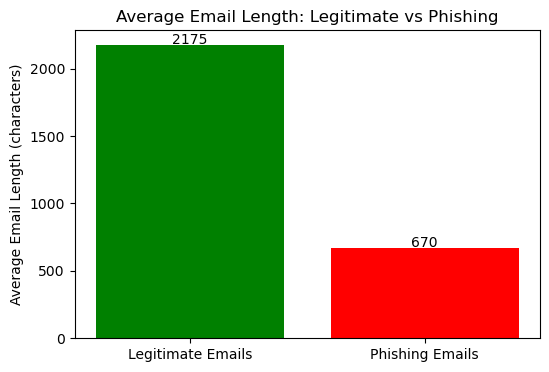

In [190]:
df['length'] = df['body_clean'].fillna('').apply(len)
# Calculate average length for each label
avg_length = df.groupby('label')['length'].mean()

# Map label numbers to readable names
labels = ['Legitimate Emails', 'Phishing Emails']

# Plot
plt.figure(figsize=(6, 4))
plt.bar(labels, avg_length, color=['green', 'red'])
plt.ylabel('Average Email Length (characters)')
plt.title('Average Email Length: Legitimate vs Phishing')

# Add value labels on bars
for i, v in enumerate(avg_length):
    plt.text(i, v + 5, f"{v:.0f}", ha='center')

plt.show()


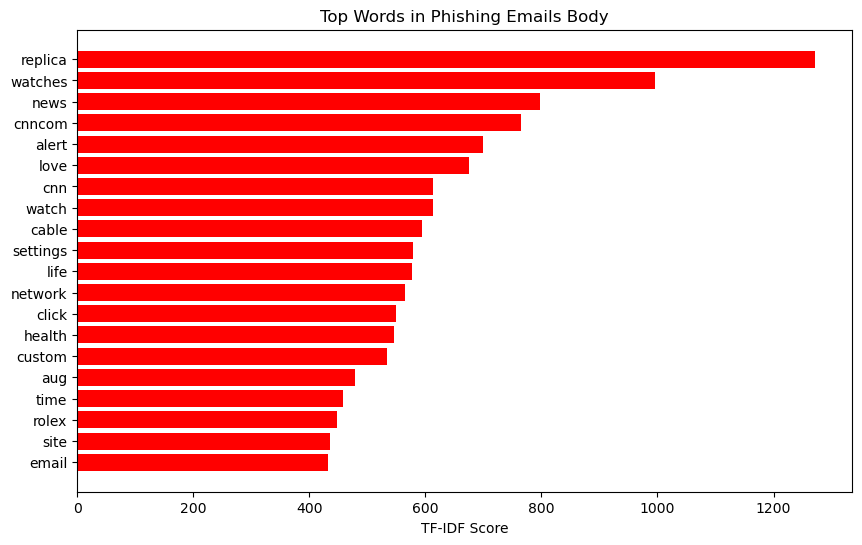

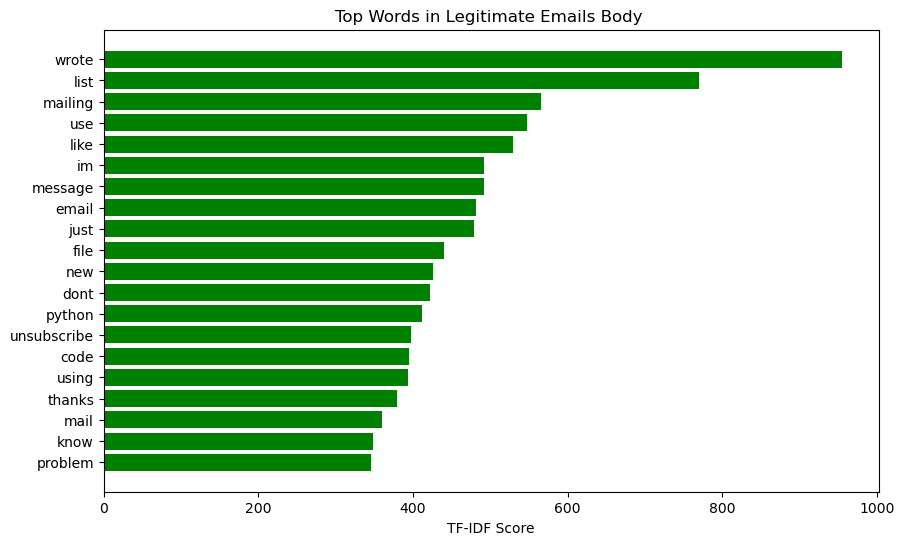

In [169]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    token_pattern=r'(?u)\b[a-zA-Z]+\b'  # only tokens with letters (no numbers)
)

# Fit vectorizer on full body text (non-null)
body_texts = df['body_clean'].dropna()
vectorizer.fit(body_texts)

# Transform phishing and legitimate separately with same vectorizer
X_phish = vectorizer.transform(df[df['label'] == 1]['body_clean'].dropna())
X_legit = vectorizer.transform(df[df['label'] == 0]['body_clean'].dropna())

# Get feature names and sum TF-IDF scores
words = vectorizer.get_feature_names_out()
phish_scores = X_phish.sum(axis=0).A1
legit_scores = X_legit.sum(axis=0).A1

# Create DataFrames sorted by descending TF-IDF score (top 20)
phish_df = pd.DataFrame({'word': words, 'score': phish_scores}).sort_values(by='score', ascending=False).head(20)
legit_df = pd.DataFrame({'word': words, 'score': legit_scores}).sort_values(by='score', ascending=False).head(20)

# Plotting function for clarity & reuse
def plot_top_words(df_words, title, color):
    plt.figure(figsize=(10,6))
    plt.barh(df_words['word'], df_words['score'], color=color)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.xlabel("TF-IDF Score")
    plt.show()

# Plot phishing top words
plot_top_words(phish_df, "Top Words in Phishing Emails Body", "red")

# Plot legit top words
plot_top_words(legit_df, "Top Words in Legitimate Emails Body ", "green")

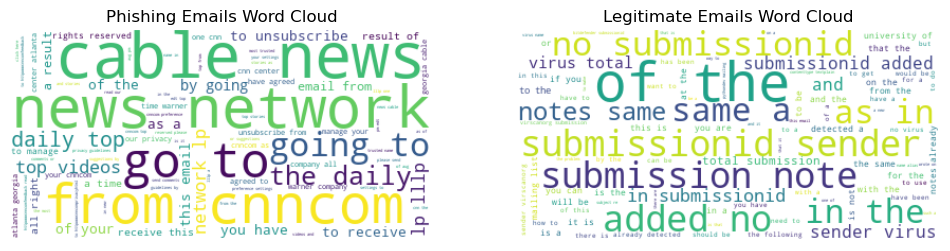

In [178]:
phish_text = ' '.join(df[df['label'] == 1]['body_clean'].dropna())

# Legitimate emails text
legit_text = ' '.join(df[df['label'] == 0]['body_clean'].dropna())

# Generate word clouds
phish_wc = WordCloud(stopwords='english', background_color='white', max_words=100).generate(phish_text)
legit_wc = WordCloud(stopwords='english', background_color='white', max_words=100).generate(legit_text)

# Plot both with titles
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(phish_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Phishing Emails Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(legit_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Legitimate Emails Word Cloud')

plt.show()

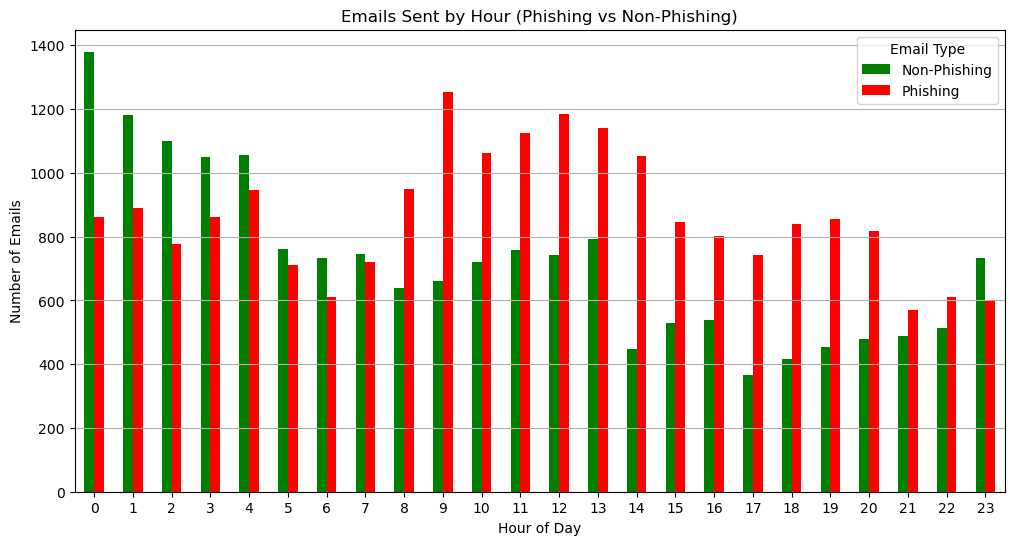

In [82]:
hour_label_counts[['Non-Phishing', 'Phishing']].plot(kind='bar', color=['green', 'red'], figsize=(12,6))

plt.title('Emails Sent by Hour (Phishing vs Non-Phishing)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Emails')
plt.xticks(rotation=0)
plt.legend(title='Email Type')
plt.grid(axis='y')

plt.show()

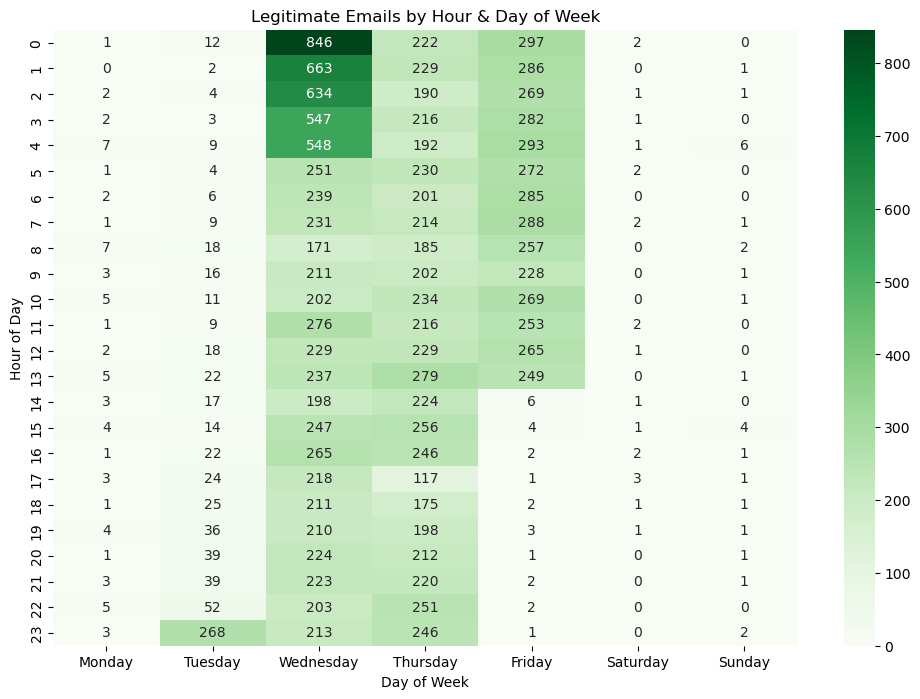

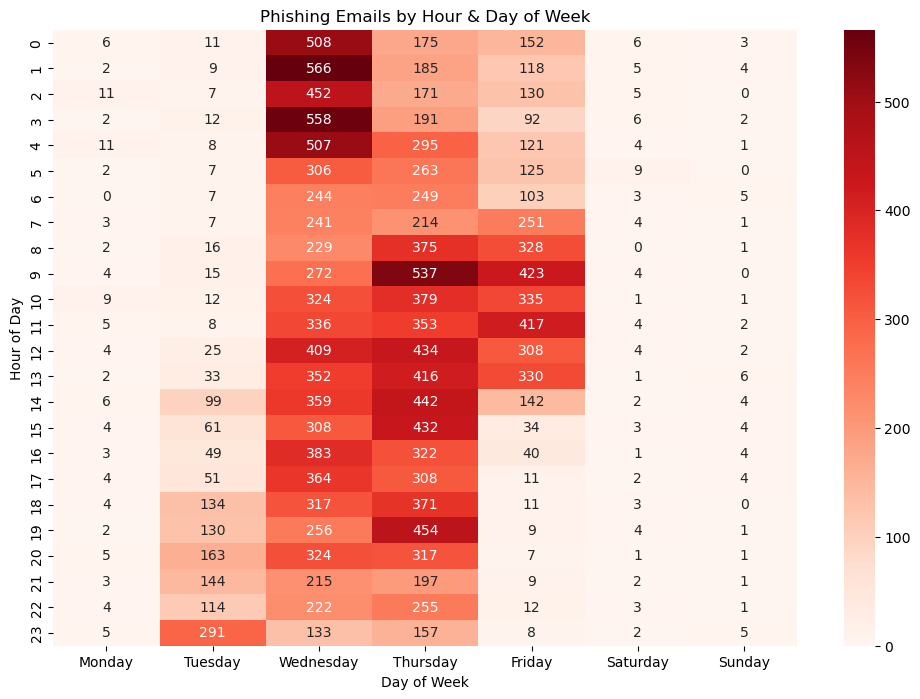

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Map numeric day_of_week to names if needed
days_map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['day_name'] = df['day_of_week'].map(days_map)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Prepare pivot tables
pivot_legit = df[df['label_name'] == 'Non-Phishing'].groupby(['hour', 'day_name']).size().unstack(fill_value=0)
pivot_legit = pivot_legit[day_order]

pivot_phishing = df[df['label_name'] == 'Phishing'].groupby(['hour', 'day_name']).size().unstack(fill_value=0)
pivot_phishing = pivot_phishing[day_order]

# Plot Legitimate emails heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_legit, annot=True, fmt='d', cmap='Greens')
plt.title('Legitimate Emails by Hour & Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

# Plot Phishing emails heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_phishing, annot=True, fmt='d', cmap='Reds')
plt.title('Phishing Emails by Hour & Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()


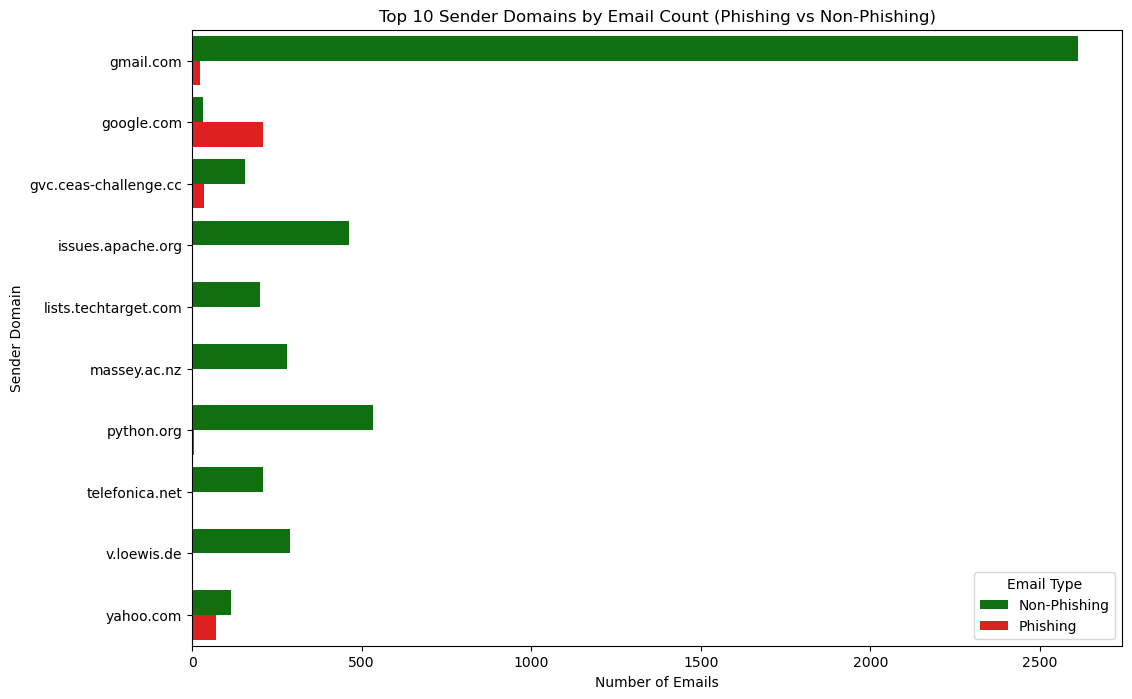

In [94]:
domain_label_counts = df.groupby(['sender_domain', 'label_name']).size().reset_index(name='count')

# Get top 10 domains by total emails (phishing + non-phishing)
top_domains = (domain_label_counts.groupby('sender_domain')['count']
               .sum()
               .sort_values(ascending=False)
               .head(10)
               .index)

# Filter data for top domains only
top_domain_data = domain_label_counts[domain_label_counts['sender_domain'].isin(top_domains)]

plt.figure(figsize=(12,8))

# Use seaborn barplot with hue for label
sns.barplot(
    data=top_domain_data,
    y='sender_domain',
    x='count',
    hue='label_name',
    palette={'Non-Phishing': 'green', 'Phishing': 'red'}
)

plt.title('Top 10 Sender Domains by Email Count (Phishing vs Non-Phishing)')
plt.xlabel('Number of Emails')
plt.ylabel('Sender Domain')
plt.legend(title='Email Type')
plt.show()

In [102]:
df['subject_length'] = df['subject_clean'].str.len()
df['body_length'] = df['body_clean'].str.len()

# Count frequency of sender domains
domain_counts = df['sender_domain'].value_counts()
df['sender_domain_freq'] = df['sender_domain'].map(domain_counts)

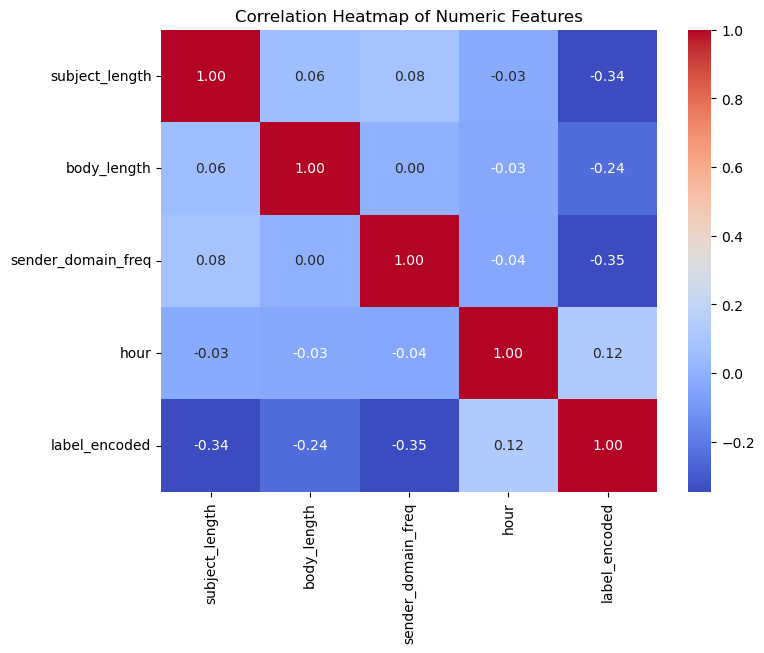

In [104]:
df['label_encoded'] = df['label_name'].map({'Non-Phishing': 0, 'Phishing': 1})

# Select numeric columns
numeric_cols = ['subject_length', 'body_length', 'sender_domain_freq', 'hour', 'label_encoded']

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

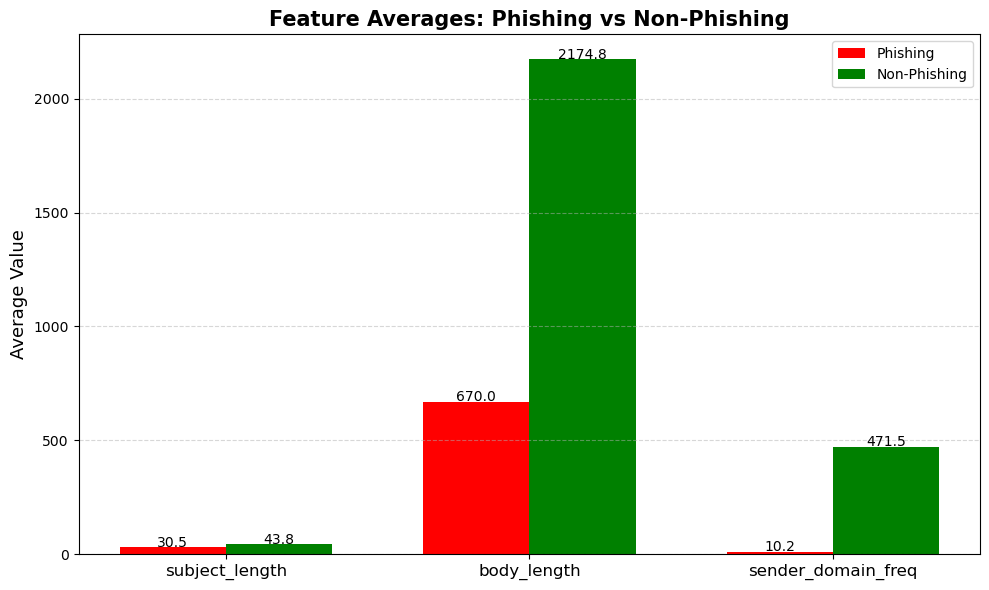

In [116]:

grouped_means = df.groupby('label_name')[['subject_length', 'body_length', 'sender_domain_freq']].mean()
features = grouped_means.columns
labels = grouped_means.index

x = np.arange(len(features))
bar_width = 0.35

# Plot bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, grouped_means.loc['Phishing'].values, width=bar_width, color='red', label='Phishing')
plt.bar(x + bar_width/2, grouped_means.loc['Non-Phishing'].values, width=bar_width, color='green', label='Non-Phishing')

# Add labels, title, legend
plt.xticks(x, features, fontsize=12)
plt.ylabel('Average Value', fontsize=13)
plt.title('Feature Averages: Phishing vs Non-Phishing', fontsize=15, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bar values (using .iloc to avoid warnings)
for i in range(len(features)):
    plt.text(x[i] - bar_width/2, grouped_means.loc['Phishing'].iloc[i] + 2, 
             f"{grouped_means.loc['Phishing'].iloc[i]:.1f}", ha='center', color='black')
    plt.text(x[i] + bar_width/2, grouped_means.loc['Non-Phishing'].iloc[i] + 2, 
             f"{grouped_means.loc['Non-Phishing'].iloc[i]:.1f}", ha='center', color='black')

plt.tight_layout()
plt.show()




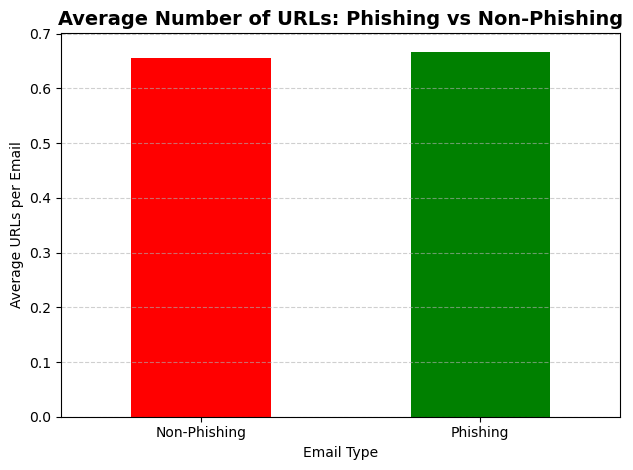

In [124]:
# Group by phishing label and calculate mean URLs
df.groupby('label_name')['urls'].mean().plot(kind='bar', color=['red', 'green'])

plt.title('Average Number of URLs: Phishing vs Non-Phishing', fontsize=14, fontweight='bold')
plt.ylabel('Average URLs per Email')
plt.xlabel('Email Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()